In [1]:
# import the necessary packages
from keras.layers import LSTM
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

Using TensorFlow backend.
/home/varun/environments/pyimagesearch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/varun/environments/pyimagesearch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/varun/environments/pyimagesearch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/va

In [2]:
df = pd.read_csv("../input/diuresis_train.csv")

In [3]:
X = np.array(df.iloc[:, 1:-1].values, dtype = np.int32)
Y = np.array(df.iloc[:, -1].values, dtype = np.int32)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [5]:
ss = StandardScaler()
ss.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [7]:
f = open("../output/ss.pkl", "wb+")
pickle.dump(ss, f)
f.close()

In [7]:
x_train = x_train[..., None]
x_test = x_test[..., None]

In [8]:
class CoronaNet:
    @staticmethod
    def build():
        model = Sequential()
        
        model.add(LSTM(128, kernel_initializer = "he_normal", input_shape = (6, 1)))
        model.add(Activation("relu"))
        
        model.add(Dense(64, kernel_initializer = "he_normal"))
        model.add(Activation("relu"))
        model.add(Dense(1, kernel_initializer = "he_normal"))
        
        return model

In [9]:
model = CoronaNet.build()
print(model.summary())

W0323 12:15:55.034915 140384376493888 deprecation_wrapper.py:119] From /home/varun/environments/pyimagesearch/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0323 12:15:55.052231 140384376493888 deprecation_wrapper.py:119] From /home/varun/environments/pyimagesearch/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0323 12:15:55.054891 140384376493888 deprecation_wrapper.py:119] From /home/varun/environments/pyimagesearch/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
EPOCHS = 75
BS = 256

model.compile(loss = "mse", optimizer = "adam")
H = model.fit(x_train, y_train, validation_data = (x_test, y_test),
             epochs = EPOCHS, batch_size = BS, verbose = 1)

W0323 12:15:56.560766 140384376493888 deprecation_wrapper.py:119] From /home/varun/environments/pyimagesearch/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0323 12:15:56.878856 140384376493888 deprecation.py:323] From /home/varun/environments/pyimagesearch/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0323 12:15:57.263978 140384376493888 deprecation_wrapper.py:119] From /home/varun/environments/pyimagesearch/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0323 12:15:57.366506 140384376493888 deprecation_wrapper.py:119] From /home/varun/en

Train on 8571 samples, validate on 2143 samples
Epoch 1/75
8571/8571 [==============================] - 4s 420us/step - loss: 1043638.3485 - val_loss: 1009855.6704
Epoch 2/75
8571/8571 [==============================] - 1s 101us/step - loss: 1008427.7079 - val_loss: 962424.3016
Epoch 3/75
8571/8571 [==============================] - 1s 89us/step - loss: 954510.9675 - val_loss: 903366.1457
Epoch 4/75
8571/8571 [==============================] - 1s 77us/step - loss: 889230.4549 - val_loss: 833080.3927
Epoch 5/75
8571/8571 [==============================] - 0s 58us/step - loss: 812610.2810 - val_loss: 747511.2225
Epoch 6/75
8571/8571 [==============================] - 0s 58us/step - loss: 580429.7720 - val_loss: 393771.0652
Epoch 7/75
8571/8571 [==============================] - 0s 58us/step - loss: 330333.7040 - val_loss: 253908.9091
Epoch 8/75
8571/8571 [==============================] - 1s 58us/step - loss: 215393.3705 - val_loss: 167564.0161
Epoch 9/75
8571/8571 [=====================

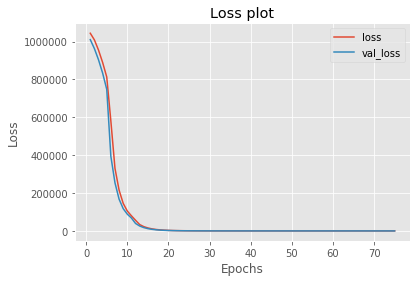

In [11]:
plt.figure()
plt.style.use("ggplot")
plt.plot(np.arange(1, EPOCHS + 1), H.history["loss"], label = "loss")
plt.plot(np.arange(1, EPOCHS + 1), H.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss plot")
plt.legend()

In [12]:
index = 456
sample = x_test[index][None, ...]
pred = model.predict(sample)

In [13]:
print(ss.inverse_transform(np.squeeze(sample)))
print(y_test[index], pred)

[210. 266. 335. 418. 515. 631.]
771 [[773.5468]]


In [15]:
model.save("../models/lstm.h5")